# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: Correlation
### VIDEO: Spearman correlation and Fisher-Z
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
# Anscobe's quartet
anscombe = np.array([
     # series 1     series 2      series 3       series 4
    [10,  8.04,    10,  9.14,    10,  7.46,      8,  6.58, ],
    [ 8,  6.95,     8,  8.14,     8,  6.77,      8,  5.76, ],
    [13,  7.58,    13,  8.76,    13, 12.74,      8,  7.71, ],
    [ 9,  8.81,     9,  8.77,     9,  7.11,      8,  8.84, ],
    [11,  8.33,    11,  9.26,    11,  7.81,      8,  8.47, ],
    [14,  9.96,    14,  8.10,    14,  8.84,      8,  7.04, ],
    [ 6,  7.24,     6,  6.13,     6,  6.08,      8,  5.25, ],
    [ 4,  4.26,     4,  3.10,     4,  5.39,      8,  5.56, ],
    [12, 10.84,    12,  9.13,    12,  8.15,      8,  7.91, ],
    [ 7,  4.82,     7,  7.26,     7,  6.42,      8,  6.89, ],
    [ 5,  5.68,     5,  4.74,     5,  5.73,     19, 12.50, ]
    ])
print(anscombe.shape)

(11, 8)


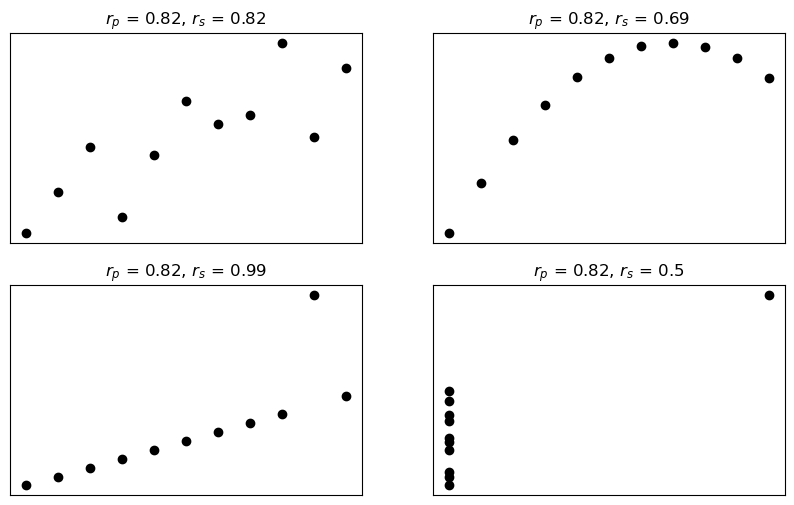

In [3]:
# plot and compute correlations
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax = ax.ravel()

# Хитрая организация.
# В anscombe идущая подряд пара столбцов соответствует одной серии
# Всего 4 серии - 8 столбцов.
# В цикле выполняется построение серий и расчёт их корреляции по Спирману и Фишеру.
for i in range(4):  # 0, 1, 2, 3
                         # x                 # y      
    ax[i].plot(anscombe[:, i*2], anscombe[:, i*2 + 1],'ko')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    corr_p = stats.pearsonr(anscombe[:, i*2], anscombe[:, i*2 + 1])[0]
    corr_s = stats.spearmanr(anscombe[:, i*2], anscombe[:, i*2 + 1])[0]
    # Why Mike suggesting these rounding manipulations?
    ax[i].set_title(f'$r_p$ = {np.round(corr_p, decimals=2)}, '
                    + f'$r_s$ = {np.round(corr_s, decimals=2)}')
    # ax[i].set_title('r_p = %g, r_s = %g'%(np.round(corr_p*100)/100, np.round(corr_s*100)/100))

plt.show()

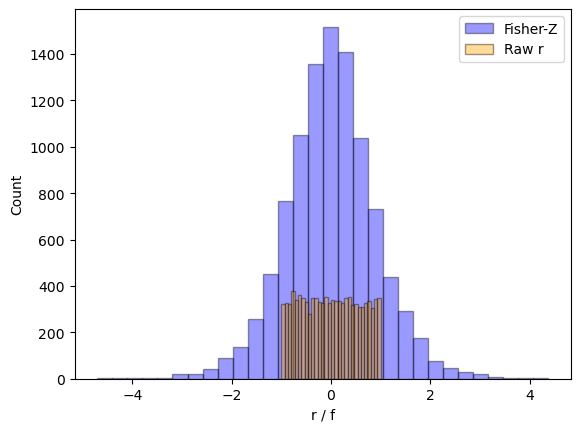

In [6]:
## Fisher-Z transform

rng = np.random.default_rng()

# simulate correlation coefficients
N = 10000
r = rng.uniform(low=-1.0, high=1.0, size=N)
# r = 2*np.random.rand(N) - 1  # rand - равномерно распределённые числа [0, 1)

# Fisher-Z
fz = np.arctanh(r)

# Функция plt.hist не используется Майком из-за того,
# что она плохо дружит с результатами np.histogram. Почему не используется plt.hist?
# # overlay the Fisher-Z
# y, x = np.histogram(fz, 30)
# x = (x[1:] + x[0:-1])/2
# plt.bar(x, y)
# # overlay the raw correlations
# y, x = np.histogram(r, 30)  
# x = (x[1:] + x[0:-1])/2
# plt.bar(x, y)

# overlay the Fisher-Z
plt.hist(x=fz, bins=30, color='b', edgecolor='black', alpha=0.4)
# overlay the raw correlations
plt.hist(x=r, bins=30, color='orange', edgecolor='black', alpha=0.4)

plt.xlabel('r / f')
plt.ylabel('Count')
plt.legend(('Fisher-Z','Raw r'))
plt.show()

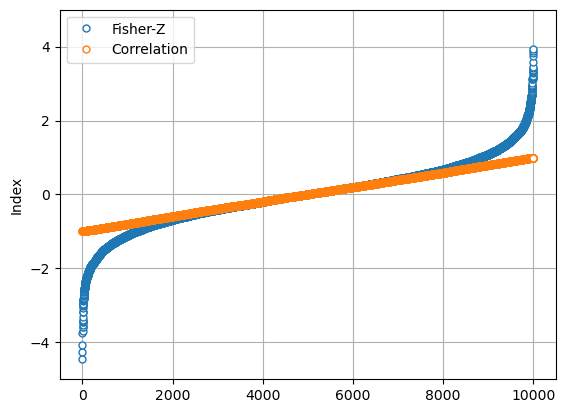

In [5]:
plt.plot(range(N), np.sort(fz), 'o', markerfacecolor='w', markersize=5)
plt.plot(range(N), np.sort(r), 'o', markerfacecolor='w', markersize=5)
# plt.plot(range(N), r, 'o', markerfacecolor='w', markersize=5)
# plt.plot(range(N), fz, 'o', markerfacecolor='w', markersize=5)
plt.ylabel('Value')
plt.ylabel('Index')
plt.legend(('Fisher-Z', 'Correlation'))

# zoom in
plt.ylim([-5, 5])
plt.grid()
plt.show()

# Видим, что для небольших значений корреляции (примерно [-0.5, 0.5])
# отличия между корреляцией Пирсона и трансформацией Фишер-Зэд пренебрежимо малы 